In [1]:
import pandas as  pd

dataframe = pd.read_csv("dados.csv")

dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)

dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [12]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values) 
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [14]:
y_pred

array([0, 3, 0, ..., 0, 0, 4])

In [15]:
# Distancia entre os pontos do msm cluster quanto mais prox de 1 melhor
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette)

0.3645219978094767


In [16]:
# Distancia entre os pontos do msm cluster quanto mais prox de 0 melhor
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0759608810957064


In [17]:
# Distancia entre os clusters
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.8011174859953


In [20]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [21]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32723798026310313 1.3095216018943303 3526.4553723329195


In [22]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.34861955528487404 1.15278483353004 3422.8431275922103


In [23]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3513225419356973 1.1173693588631282 3019.117443268066


In [24]:
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.040209612655344555 3.4539005447962667 305.67889391978304
0.34861955528487404 1.15278483353004 3422.8431275922103


In [25]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.0563346979449357 1204.111582769171
0.3532183246410258 1.142940860955218 1194.9401425417566
0.36704188760608253 1.098493261377676 1167.5309516804


<function matplotlib.pyplot.show(close=None, block=None)>

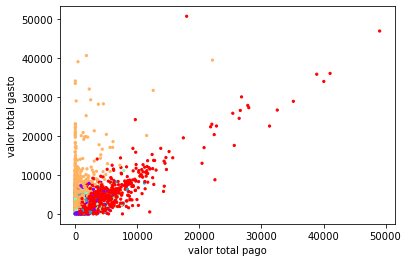

In [26]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density. Either provide the bandwidth during initialization or use an alternative method.

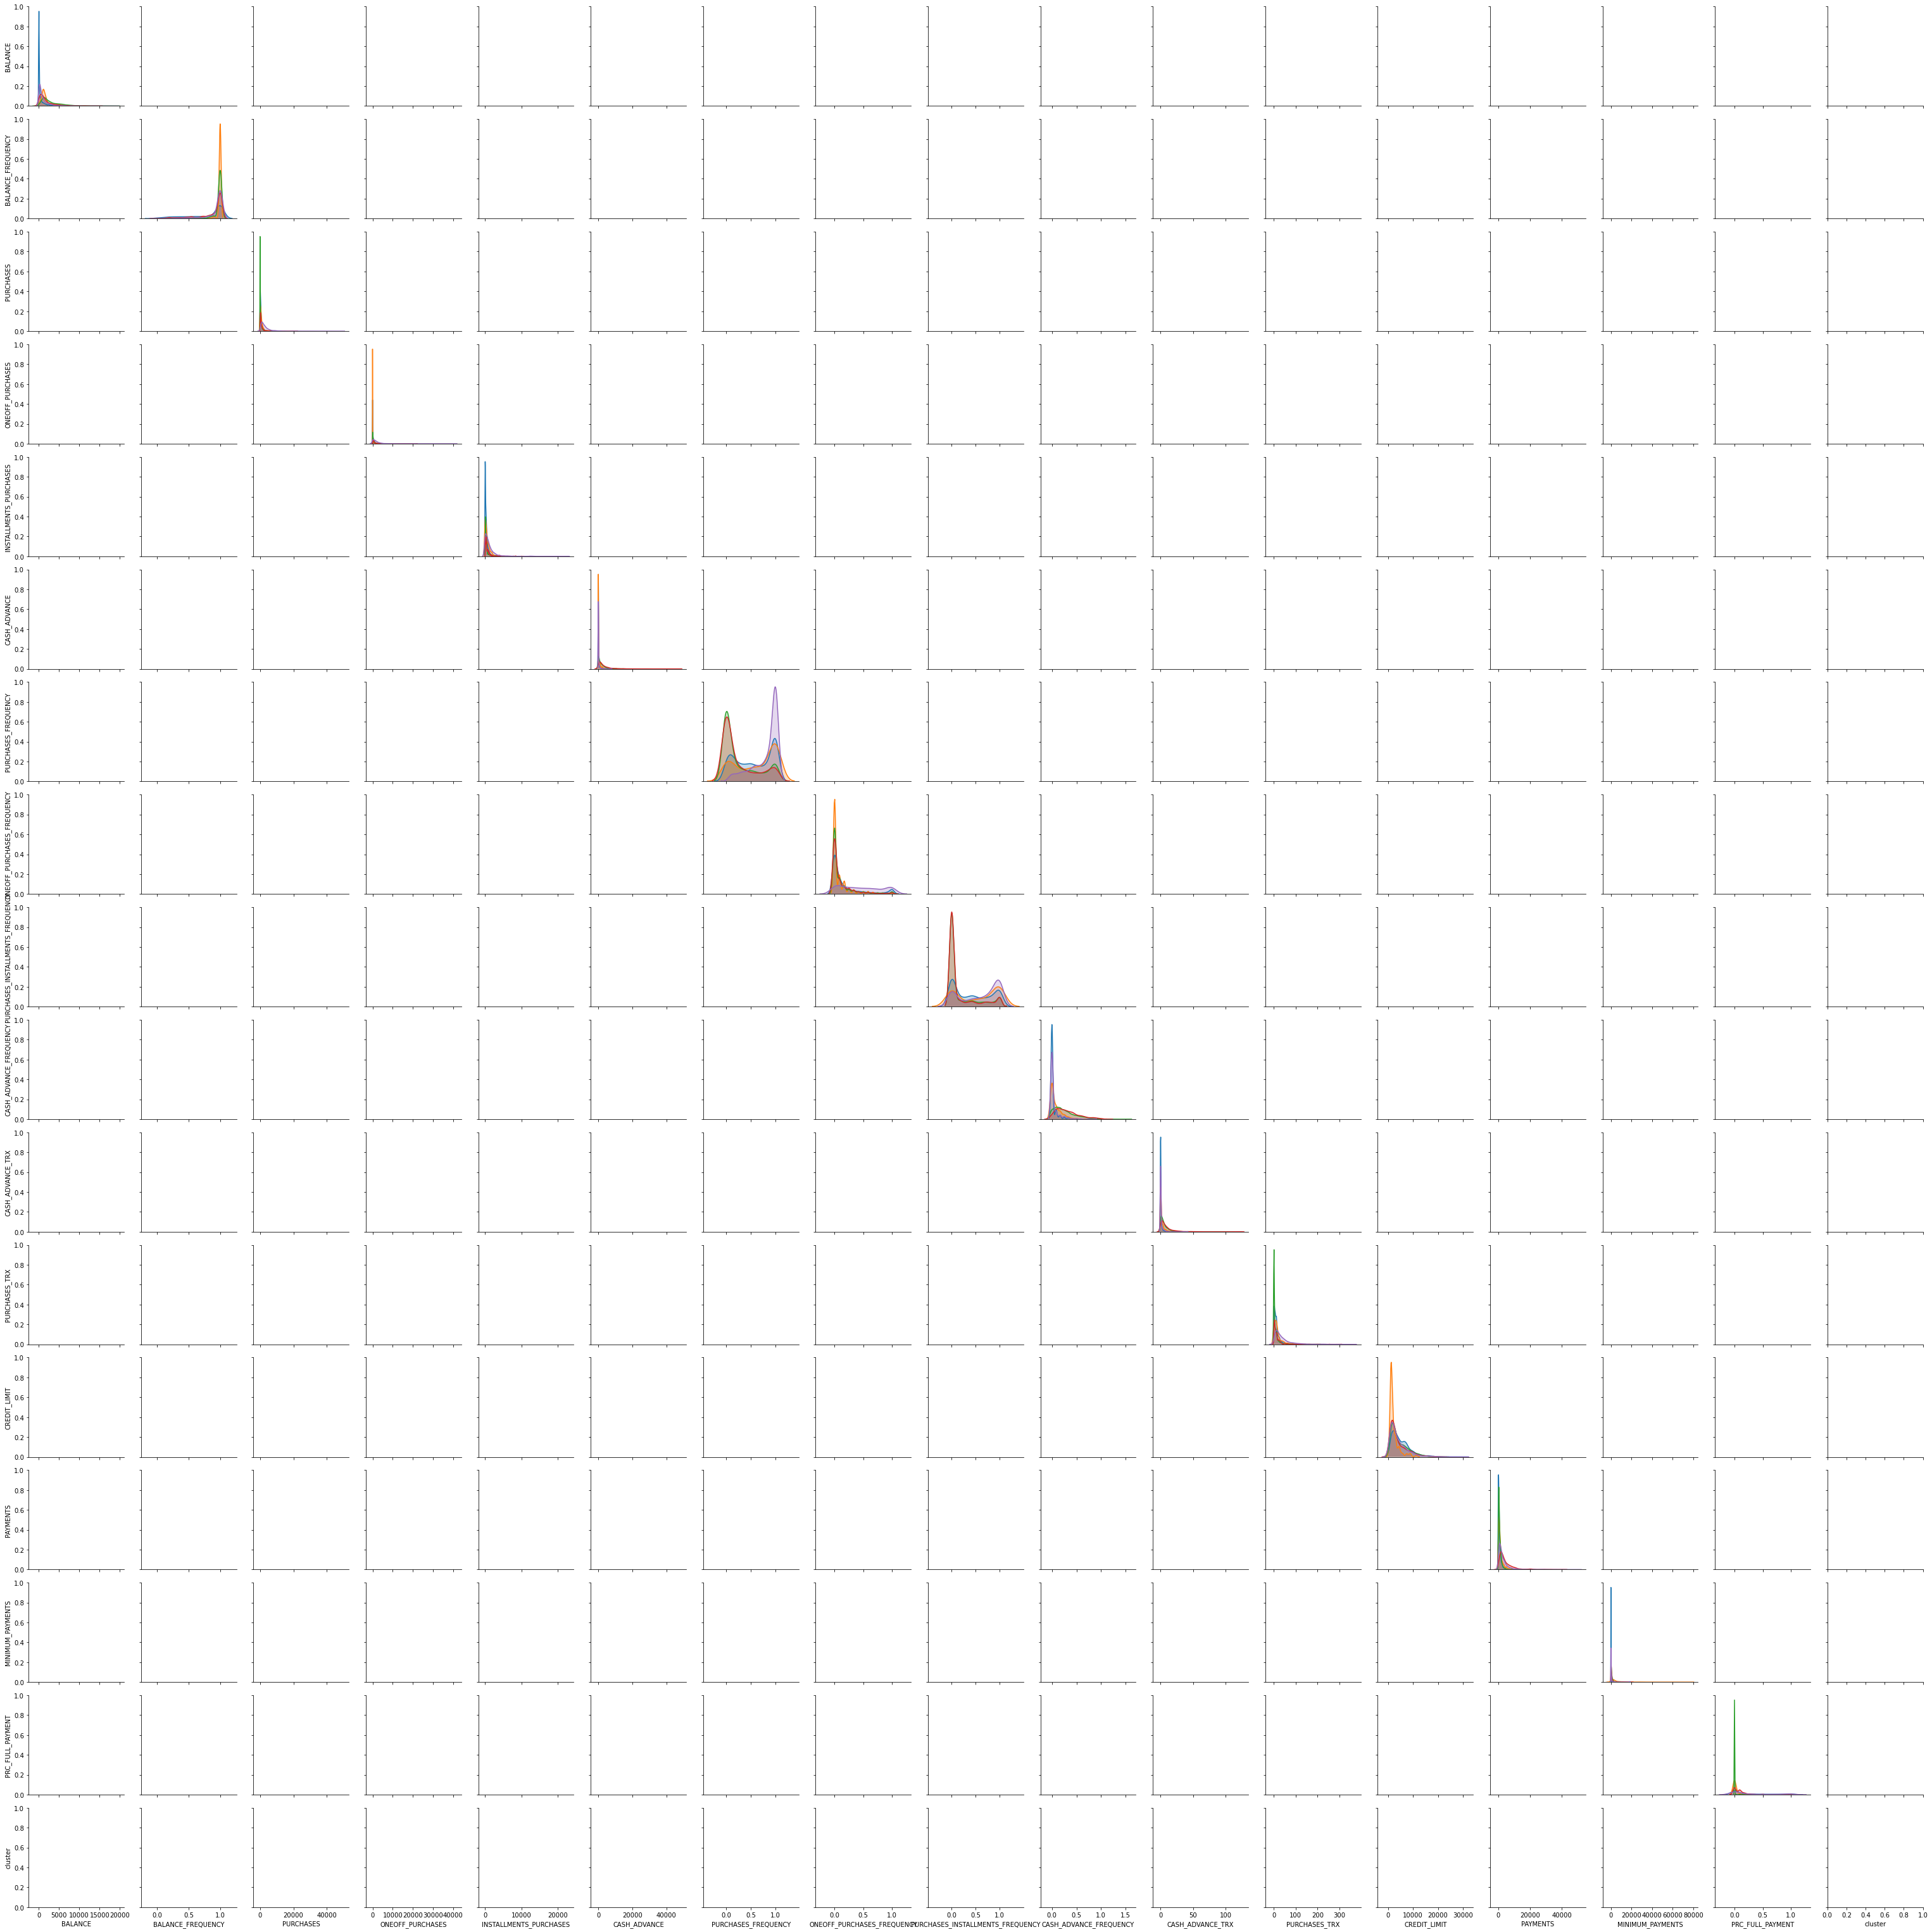

In [27]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [28]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1         411.0  1987.501586  1854.459156  70.794108  1018.958891   
2        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
3        1074.0  1796.066730  1981.709522   0.000000   507.348768   
4        1537.0  1142.320861  1664.363459   0.000000   212.282538   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        1337.287314  2138.678431  11670.179850             411.0  0.989486   
2        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
3        1092.020518  2319.052556  14581.459140            1074.0  0.862285   
4         555.131027  1370.317105  19043.138560            1537.0  0.928267   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.733727   4483.503862           3280.0  0.246806   
1        ...      7112.618584  76406.207520            411.0  0.019318   
2        ...      1330.437428   8345.641905           2648.0  0.001800   
3        ...       885.787665  21235.065300           1074.0  0.117321   
4        ...       523.893953  18621.013310           1537.0  0.278150   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346748  0.0  0.0  0.000000  0.444444  1.0  
1        0.090901  0.0  0.0  0.000000  0.000000  1.0  
2        0.023264  0.0  0.0  0.000000  0.000000  0.6  
3        0.186720  0.0  0.0  0.083333  0.142857  1.0  
4        0.367086  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [29]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.90071773e-02 2.30718554e-04 1.21544417e-01 4.79816606e-02
  7.36630157e-02 2.43125432e-02 1.72915820e-04 3.36789398e-05
  1.40371107e-04 7.91422881e-06 1.23860850e-04 2.86468615e-03
  9.43573334e-01 1.53792838e-01 5.68347988e-02 7.61725600e-05]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [5.04231090e-01 2.72311689e-04 6.17321425e-02 3.62269020e-02
  2.55269536e-02 2.52702410e-01 6.72689504e-05 2.56975193e-05
  4.50239293e-05 5.74188452e-05 1.15642722e-03 1.33088960e-03
  7.19333925e-01 1.66164378e-01 1.79180227e-01 5.52303554e-07]
 [2.35306625e-01 2.16352812e-04 6.05163989e-02 3.44248410e-02
  2.60967627e-02 3.99956952e-01 5.27259778e-05 2.05044082e-05
  3.52934886e-05 6.54492579e-05 1.57058848e-03 1.12580417e-03
  5.35234813e-01 5.97766487e-01 1.04466914e-01 2.77090123e-05]
 [1.

In [30]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [31]:
dataframe.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3280.0,443.746756,846.398201,0.000000,23.365333,82.941478,410.126095,9630.367575
1,411.0,1987.501586,1854.459156,70.794108,1018.958891,1337.287314,2138.678431,11670.179850
2,2648.0,3038.132314,2479.290949,6.824905,1256.126442,2173.994774,4224.605542,18495.558550
3,1074.0,1796.066730,1981.709522,0.000000,507.348768,1092.020518,2319.052556,14581.459140
4,1537.0,1142.320861,1664.363459,0.000000,212.282538,555.131027,1370.317105,19043.138560


In [35]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
description.mean()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
cluster,,,,,
0,443.746756,629.249107,141.482978,5130.547795,814.294226
1,1987.501586,854.865815,421.129352,2227.737226,1336.238911
2,3038.132314,385.096760,1636.114441,4496.336858,968.599396
3,1796.066730,477.099721,3267.660346,3981.537441,4710.615663
4,1142.320861,3273.425517,183.376625,4097.306540,3036.763695


In [37]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,443.746756,629.249107,141.482978,5130.547795,814.294226,3280
1,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411
2,3038.132314,385.096760,1636.114441,4496.336858,968.599396,2648
3,1796.066730,477.099721,3267.660346,3981.537441,4710.615663,1074
4,1142.320861,3273.425517,183.376625,4097.306540,3036.763695,1537


CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4: Clientes com o menor limite.

In [38]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
1,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
2,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
3,1074.0,0.117321,0.186720,0.0,0.0,0.083333,0.142857,1.0
4,1537.0,0.278150,0.367086,0.0,0.0,0.083333,0.545455,1.0


CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.